# House Price Prediction

In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [281]:
data_train=pd.read_csv(r'C:\Users\wlpch\Documents\sab\house-prices-advanced-regression-techniques\train.csv')

In [282]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [283]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [284]:
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [285]:
data_train.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [286]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [287]:
data_train['SalePrice']=data_train['SalePrice'].astype(int)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

In [288]:
data_train.columns[data_train.isnull().any()]


Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [289]:
data_train[['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
LotFrontage     1201 non-null float64
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
FireplaceQu     770 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
dtypes: float64(3), object(12)
memory usage: 171.2+ KB


In [290]:
data_train[['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond']].head()

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA


In [291]:
data_train['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [292]:
data_train['FireplaceQu']=data_train['FireplaceQu'].fillna(value='No Fireplace')
data_train['LotFrontage']=data_train['LotFrontage'].fillna(value=data_train['LotFrontage'].mean())
data_train['MasVnrArea']=data_train['MasVnrArea'].fillna(value=data_train['MasVnrArea'].mean())
data_train['GarageYrBlt']=data_train['GarageYrBlt'].fillna(value=data_train['GarageYrBlt'].mode()[0]).astype(int)
data_train['MasVnrType']=data_train['MasVnrType'].fillna(value=data_train['MasVnrType'].mode()[0])
data_train['BsmtQual']=data_train['BsmtQual'].fillna(value='Unknown')
data_train['BsmtCond']=data_train['BsmtCond'].fillna(value='Unknown')
data_train['BsmtExposure']=data_train['BsmtExposure'].fillna(value='NA')
data_train['BsmtFinType1']=data_train['BsmtFinType1'].fillna(value='NA')
data_train['BsmtFinType2']=data_train['BsmtFinType2'].fillna(value='NA')
data_train['Electrical']=data_train['Electrical'].fillna(value=data_train['Electrical'].mode()[0])
data_train['GarageType']=data_train['GarageType'].fillna(value='NA')
data_train['FireplaceQu']=data_train['FireplaceQu'].fillna(value='NA')
data_train['GarageFinish']=data_train['GarageFinish'].fillna(value='NA')
data_train['GarageQual']=data_train['GarageQual'].fillna(value='NA')
data_train['GarageCond']=data_train['GarageCond'].fillna(value='NA')

In [293]:
data_train['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [294]:
num_vars = [var for var in data_train.columns if data_train[var].dtypes != 'O']
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
print(year_vars)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [295]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

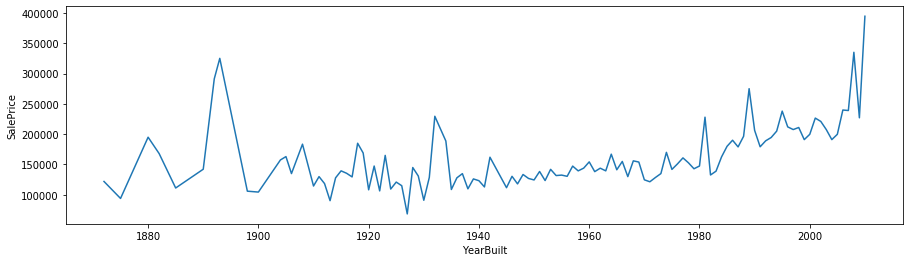

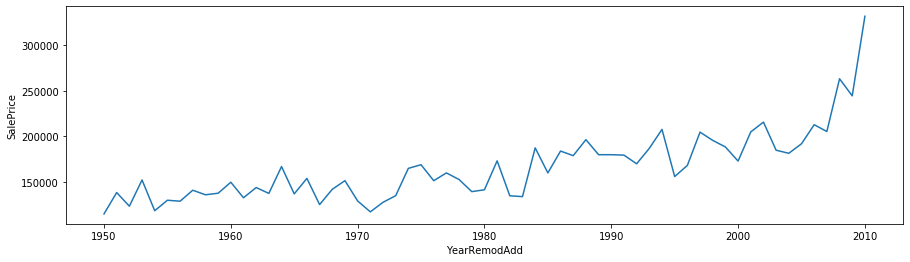

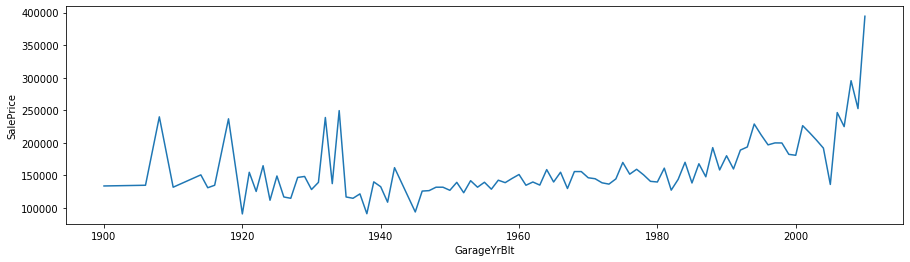

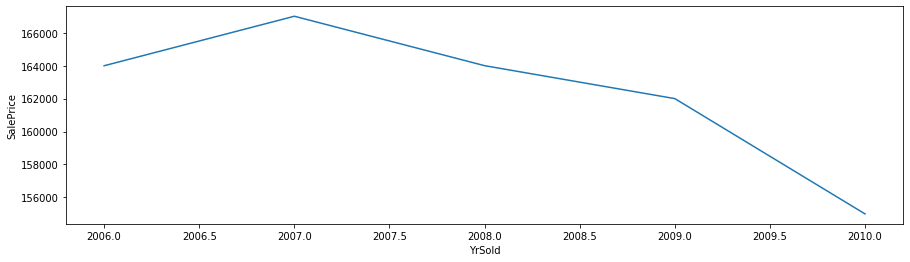

In [296]:
def plotyrgraph(dt):
    df=data_train.groupby(dt)['SalePrice'].median()
    df=df.to_frame()
    df.reset_index(level=0,inplace=True)
    df.columns
    plt.figure(figsize=(15,4))
    plt.plot(df[dt],df['SalePrice'])
    plt.xlabel(dt)
    plt.ylabel('SalePrice') 
    plt.show()


for vars in year_vars:
    plotyrgraph(vars)

In [297]:
def plotyrgraph_scatter(dt_X,dt_Y):
    plt.figure(figsize=(15,4))
    plt.scatter(data_train[dt_X],data_train[dt_Y])
    plt.xlabel(dt_X)
    plt.ylabel(dt_Y) 
    plt.show()

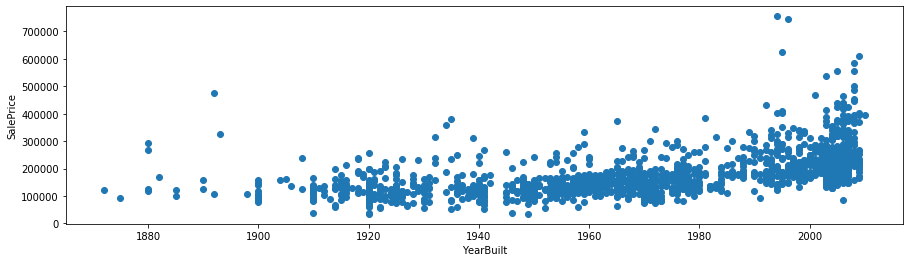

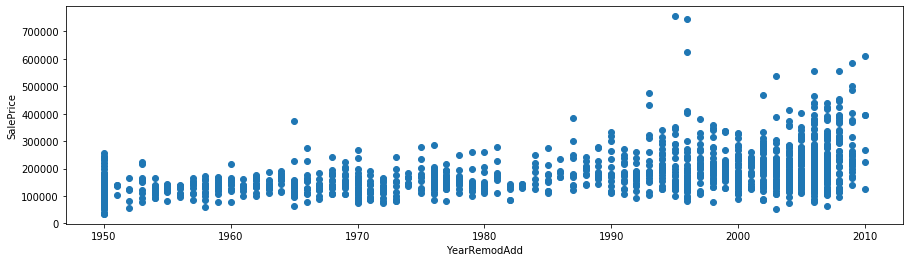

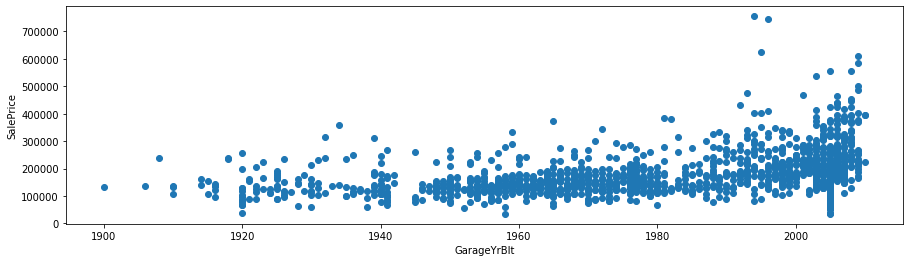

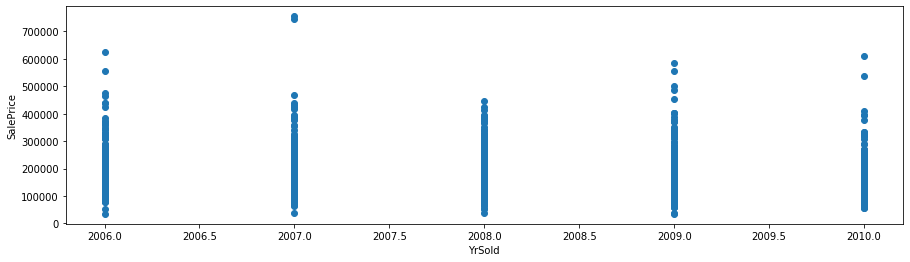

In [298]:
for vars in year_vars:
    plotyrgraph_scatter(vars,'SalePrice')

In [299]:
def plotyrgraph_hist(dt_X,dt_Y):
    plt.figure(figsize=(15,4))
    sns.barplot(data_train[dt_X],data_train[dt_Y])
    plt.xlabel(dt_X)
    plt.xticks(rotation = 45)
    plt.ylabel(dt_Y) 
    plt.show()

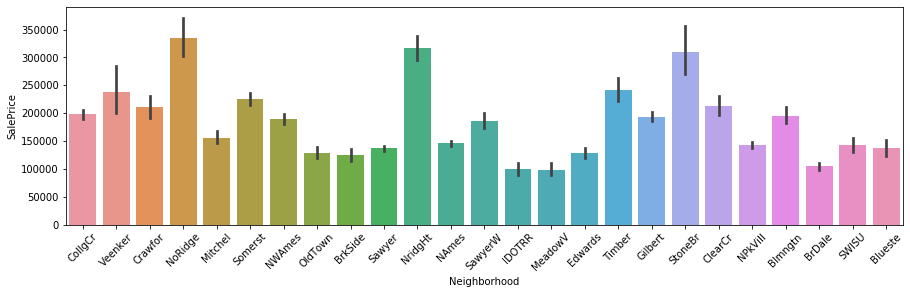

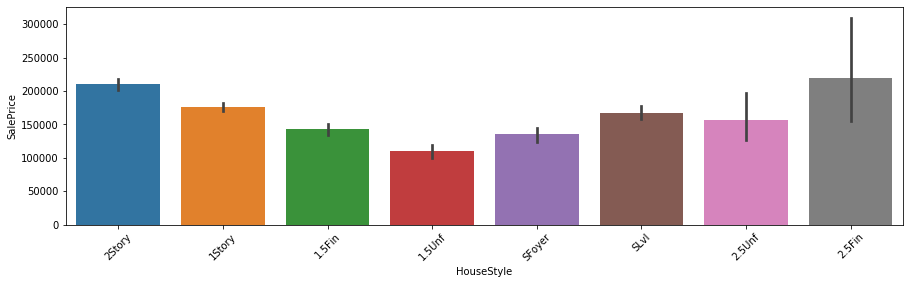

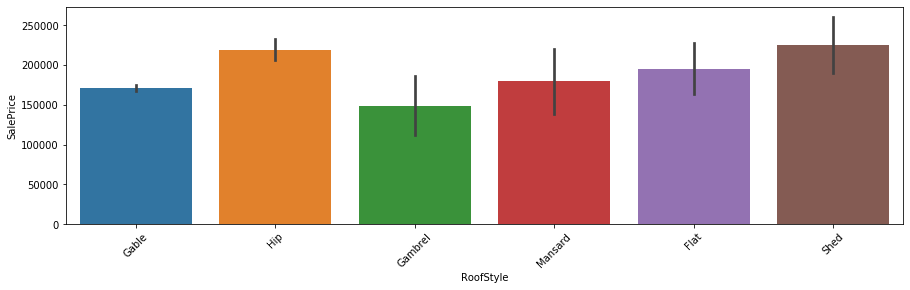

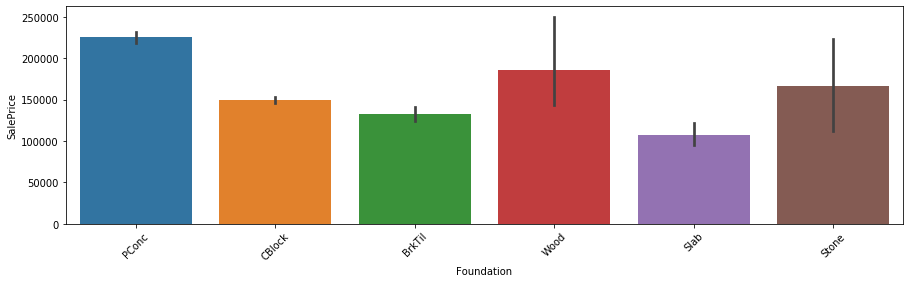

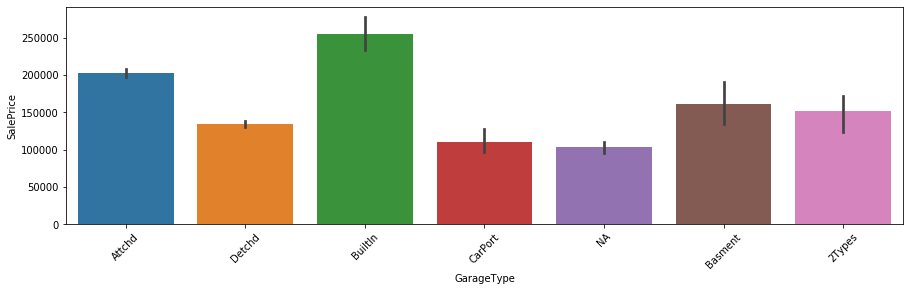

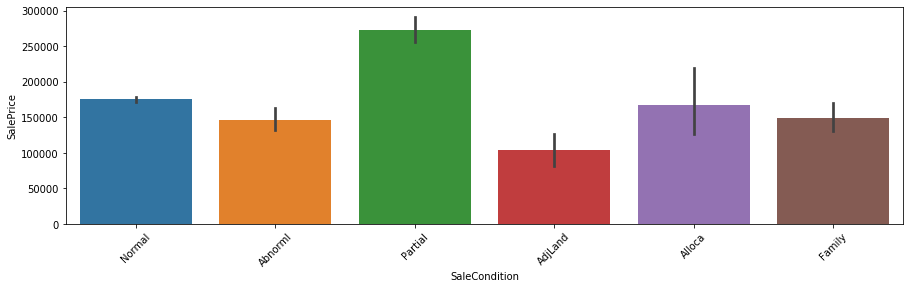

In [300]:
var_data=['Neighborhood','HouseStyle','RoofStyle','Foundation','GarageType','SaleCondition']
for var in var_data :
    plotyrgraph_hist(var,'SalePrice')

# Neighborhood: Physical locations within Ames city limits
       Blmngtn	=> Bloomington Heights
       Blueste	=> Bluestem
       BrDale	=> Briardale
       BrkSide	=> Brookside
       ClearCr	=> Clear Creek
       CollgCr	=> College Creek
       Crawfor	=> Crawford
       Edwards	=> Edwards
       Gilbert	=> Gilbert
       IDOTRR	=> Iowa DOT and Rail Road
       MeadowV	=> Meadow Village
       Mitchel	=> Mitchell
       Names	=> North Ames
       NoRidge	=> Northridge
       NPkVill	=> Northpark Villa
       NridgHt	=> Northridge Heights
       NWAmes	=> Northwest Ames
       OldTown	=> Old Town
       SWISU	=> South & West of Iowa State University
       Sawyer	=> Sawyer
       SawyerW	=> Sawyer West
       Somerst	=> Somerset
       StoneBr	=> Stone Brook
       Timber	=> Timberland
       Veenker	=> Veenker
       
# HouseStyle: Style of dwelling
	
       1Story	=> One story
       1.5Fin	=> One and one-half story: 2nd level finished
       1.5Unf	=> One and one-half story: 2nd level unfinished
       2Story	=> Two story
       2.5Fin	=> Two and one-half story: 2nd level finished
       2.5Unf	=> Two and one-half story: 2nd level unfinished
       SFoyer	=> Split Foyer
       SLvl	  => Split Level
       
# RoofStyle: Type of roof

       Flat 	=> Flat
       Gable	=> Gable
       Gambrel	=> Gabrel (Barn)
       Hip  	=> Hip
       Mansard	=> Mansard
       Shed 	=> Shed
       
# Foundation: Type of foundation
		
       BrkTil	=> Brick & Tile
       CBlock	=> Cinder Block
       PConc	=> Poured Contrete	
       Slab 	=> Slab
       Stone	=> Stone
       Wood	    => Wood
        
# GarageType: Garage location
		
       2Types	=> More than one type of garage
       Attchd	=> Attached to home
       Basment	=> Basement Garage
       BuiltIn	=> Built-In (Garage part of house - typically has room above garage)
       CarPort	=> Car Port
       Detchd	=> Detached from home
       NA	    => No Garage
       
# SaleCondition: Condition of sale

       Normal	=> Normal Sale
       Abnorml	=> Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	=> Adjoining Land Purchase
       Alloca	=> Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	=> Sale between family members
       Partial	=> Home was not completed when last assessed (associated with New Homes)

In [301]:
dup_train_data=data_train

In [302]:
var_category=[var_category for var_category in data_train.columns if dup_train_data[var_category].dtype=='O']

In [303]:
len(var_category)

39

In [304]:
for vars_encode in var_category:
    Parchnum={ni:indi for indi,ni in enumerate(set(dup_train_data[vars_encode]))}
    dup_train_data[vars_encode]=[Parchnum[ni] for ni in dup_train_data[vars_encode]]

In [305]:
X=dup_train_data.drop(['SalePrice'],axis=1)
y=dup_train_data['SalePrice']
X['Utilities'].unique()

array([0, 1], dtype=int64)

In [306]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [307]:
## import array as arr 
clf = LinearRegression().fit(X, y)
importance = clf.coef_
feature=pd.DataFrame()
feature['name']=X.columns
feature['linear coef']=abs(importance)
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
feature['Annova f']=fs.scores_
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
feature['Mutual info']=fs.scores_
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
feature['Chi squared']=fs.scores_
feature.describe()

,linear coef,Annova f,Mutual info,Chi squared
count,75.000000,75.000000,75.000000,7.500000e+01
mean,3905.225833,1.381354,1.100123,1.437669e+05
std,9227.428856,0.743104,1.352314,7.682557e+05
min,0.162980,0.251072,0.000000,5.135040e-01
25%,56.732547,0.925165,0.145318,1.618121e+02
50%,489.064018,1.173966,0.503741,5.458801e+02
75%,3097.234871,1.518837,1.614624,1.082308e+04
max,53690.850036,5.440608,4.601385,6.589817e+06


In [308]:
feature1=feature.sort_values(by=['Mutual info'],ascending=False).head(10)
HX=feature1
feature1=feature.sort_values(by=['Annova f'],ascending=False).head(10)
HX=pd.concat([HX,feature1])
feature1=feature.sort_values(by=['Chi squared'],ascending=False).head(10)
HX=pd.concat([HX,feature1])
HX=HX.drop_duplicates()
TX=X[HX['name']]
TX

,Street,KitchenAbvGr,Heating,LandSlope,GarageQual,PavedDrive,GarageCond,Electrical,SaleType,SaleCondition,...,MasVnrArea,YearBuilt,1stFlrSF,MiscVal,2ndFlrSF,PoolArea,BsmtFinSF2,BsmtFinSF1,BsmtUnfSF,LowQualFinSF
0,1,1,2,1,4,1,4,1,1,1,...,196.0,2003,856,0,854,0,0,706,150,0
1,1,1,2,1,4,1,4,1,1,1,...,0.0,1976,1262,0,0,0,0,978,284,0
2,1,1,2,1,4,1,4,1,1,1,...,162.0,2001,920,0,866,0,0,486,434,0
3,1,1,2,1,4,1,4,1,1,2,...,0.0,1915,961,0,756,0,0,216,540,0
4,1,1,2,1,4,1,4,1,1,1,...,350.0,2000,1145,0,1053,0,0,655,490,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,2,1,4,1,4,1,1,1,...,0.0,1999,953,0,694,0,0,0,953,0
1456,1,1,2,1,4,1,4,1,1,1,...,119.0,1978,2073,0,0,0,163,790,589,0
1457,1,1,2,1,4,1,4,1,1,1,...,0.0,1941,1188,2500,1152,0,0,275,877,0
1458,1,1,2,1,4,1,4,0,1,1,...,0.0,1950,1078,0,0,0,1029,49,0,0


In [309]:
#feature1=feature[(feature['Chi squared']>0) & (feature['Mutual info']>3.1) & (feature['linear coef']>0) & (feature['Annova f']>=0.7)]
#TX=X[feature1['name']]
#feature1

In [310]:
#np.isnan(TX.any()) #and gets False

In [311]:
#np.isfinite(TX.all()) #and gets True

In [312]:
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

In [313]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(TX)
scaler.transform(TX)

array([[1.        , 0.33333333, 0.4       , ..., 0.12508859, 0.06421233,
        0.        ],
       [1.        , 0.33333333, 0.4       , ..., 0.17328136, 0.12157534,
        0.        ],
       [1.        , 0.33333333, 0.4       , ..., 0.08610914, 0.18578767,
        0.        ],
       ...,
       [1.        , 0.33333333, 0.4       , ..., 0.04872431, 0.37542808,
        0.        ],
       [1.        , 0.33333333, 0.4       , ..., 0.00868179, 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.4       , ..., 0.14705882, 0.05821918,
        0.        ]])

In [314]:
KFold_Score = pd.DataFrame()
classifiers = ['Linear SVM', 'Radial SVM', 'LogisticRegression', 
               'RandomForestClassifier', 'AdaBoostClassifier', 
               'XGBoostClassifier', 'KNeighborsClassifier','GradientBoostingClassifier']
models = [SVR(kernel='linear'),
          SVR(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestRegressor(random_state=1, n_jobs=-1),
          AdaBoostRegressor(random_state = 0),
          XGBRegressor(n_estimators=100),
          KNeighborsRegressor(),
          GradientBoostingRegressor(random_state=0)
         ]
j = 0

In [315]:
for i in models:
    model = i
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    KFold_Score[classifiers[j]] = (cross_val_score(model, TX, np.ravel(y), scoring = 'neg_mean_squared_error', cv=cv,n_jobs=-1))
    j=j+1

In [316]:
mean = pd.DataFrame(KFold_Score.mean(), index= classifiers)
KFold_Score = pd.concat([KFold_Score,mean.T])
KFold_Score.index=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean']
KFold_Score.T.sort_values(by=['Mean'], ascending = False)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
LogisticRegression,-3.733524e+08,-2.530605e+08,-3.570227e+08,-2.191505e+08,-2.651569e+08,-2.935486e+08
GradientBoostingClassifier,-7.445271e+08,-7.213327e+08,-1.440189e+09,-7.013106e+08,-5.556799e+08,-8.326078e+08
XGBoostClassifier,-7.261896e+08,-6.634349e+08,-1.461073e+09,-7.467416e+08,-5.658815e+08,-8.326642e+08
RandomForestClassifier,-1.049219e+09,-7.655421e+08,-1.420950e+09,-9.476465e+08,-7.685946e+08,-9.903905e+08
AdaBoostClassifier,-1.257628e+09,-1.154905e+09,-1.722685e+09,-1.228110e+09,-8.788804e+08,-1.248442e+09
Linear SVM,-3.207246e+09,-1.129848e+09,-2.065661e+09,-1.585432e+09,-1.156770e+09,-1.828991e+09
KNeighborsClassifier,-2.628608e+09,-1.584886e+09,-3.052737e+09,-2.811309e+09,-1.798614e+09,-2.375231e+09
Radial SVM,-7.243343e+09,-5.675752e+09,-8.021115e+09,-7.335946e+09,-4.958049e+09,-6.646841e+09


In [317]:
parameter={
           'solver':['saga'],
           }

In [318]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(TX,y,test_size=0.20,random_state=40)

In [319]:
grid_cv=GridSearchCV(LogisticRegression(), parameter,scoring='neg_mean_squared_error',cv=10,verbose=1,n_jobs=-1)

In [320]:
#Street	Utilities	LandSlope	RoofMatl	KitchenAbvGr	Electrical	PavedDrive	LandContour	BsmtCond	SaleCondition


In [321]:
grid_cv.fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   37.2s remaining:   24.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   52.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silenc

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1, param_grid={'solver': ['saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [322]:
grid_cv.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [323]:
clfxgb=LogisticRegression(max_iter=1000,C=0.5,solver='saga',multi_class='ovr',verbose=2,n_jobs=-1)

In [324]:
clfxgb.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s


max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 2 seconds
max_iter reached after 2 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 2 seconds
max_iter reached after 2 seconds
max_iter reached after 2 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
convergence after 721 epochs took 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.9s


max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter r

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   42.8s


max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter r

[Parallel(n_jobs=-1)]: Done 581 out of 581 | elapsed:  1.2min finished


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=2,
                   warm_start=False)

In [325]:
y_pred=clfxgb.predict(X_test)

In [326]:
from sklearn.metrics import accuracy_score,mean_squared_error
mean_squared_error(y_test,y_pred)

175557802.40068492

500 =168517257.90753424
1000=164263874.23630136
1500=165160323.3321918
2000=200896309.19520548

In [327]:
from math import sqrt
sqrt(mean_squared_error(y_test,y_pred))

13249.822730915494

In [358]:
dup_data_test=pd.read_csv(r'C:\Users\wlpch\Documents\sab\house-prices-advanced-regression-techniques\test.csv')

In [361]:
dup_data_test
dup_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [360]:
data_test=dup_data_test.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [362]:
data_test.columns[data_test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

In [363]:
data_test[['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 29 columns):
MSZoning        1455 non-null object
LotFrontage     1232 non-null float64
Utilities       1457 non-null object
Exterior1st     1458 non-null object
Exterior2nd     1458 non-null object
MasVnrType      1443 non-null object
MasVnrArea      1444 non-null float64
BsmtQual        1415 non-null object
BsmtCond        1414 non-null object
BsmtExposure    1415 non-null object
BsmtFinType1    1417 non-null object
BsmtFinSF1      1458 non-null float64
BsmtFinType2    1417 non-null object
BsmtFinSF2      1458 non-null float64
BsmtUnfSF       1458 non-null float64
TotalBsmtSF     1458 non-null float64
BsmtFullBath    1457 non-null float64
BsmtHalfBath    1457 non-null float64
KitchenQual     1458 non-null object
Functional      1457 non-null object
FireplaceQu     729 non-null object
GarageType      1383 non-null object
GarageYrBlt     1381 non-null float64
GarageFinish    1381 non-null obje

In [364]:
data_test['FireplaceQu']=data_test['FireplaceQu'].fillna(value='No Fireplace')
data_test['LotFrontage']=data_test['LotFrontage'].fillna(value=data_test['LotFrontage'].mean())
data_test['MasVnrArea']=data_test['MasVnrArea'].fillna(value=data_test['MasVnrArea'].mean())
data_test['GarageYrBlt']=data_test['GarageYrBlt'].fillna(value=data_test['GarageYrBlt'].mode()[0]).astype(int)
data_test['MasVnrType']=data_test['MasVnrType'].fillna(value=data_test['MasVnrType'].mode()[0])
data_test['BsmtQual']=data_test['BsmtQual'].fillna(value='Unknown')
data_test['BsmtCond']=data_test['BsmtCond'].fillna(value='Unknown')
data_test['BsmtExposure']=data_test['BsmtExposure'].fillna(value='NA')
data_test['BsmtFinType1']=data_test['BsmtFinType1'].fillna(value='NA')
data_test['BsmtFinType2']=data_test['BsmtFinType2'].fillna(value='NA')
data_test['Electrical']=data_test['Electrical'].fillna(value=data_train['Electrical'].mode()[0])
data_test['GarageType']=data_test['GarageType'].fillna(value='NA')
data_test['FireplaceQu']=data_test['FireplaceQu'].fillna(value='NA')
data_test['GarageFinish']=data_test['GarageFinish'].fillna(value='NA')
data_test['GarageQual']=data_test['GarageQual'].fillna(value='NA')
data_test['GarageCond']=data_test['GarageCond'].fillna(value='NA')
data_test['MSZoning']=data_test['MSZoning'].fillna(value=data_test['MSZoning'].mode()[0])
data_test['Utilities']=data_test['Utilities'].fillna(value=data_test['Utilities'].mode()[0])
data_test['Exterior1st']=data_test['Exterior1st'].fillna(value=data_test['Exterior1st'].mode()[0])
data_test['Exterior2nd']=data_test['Exterior2nd'].fillna(value=data_test['Exterior2nd'].mode()[0])
data_test['BsmtFinSF1']=data_test['BsmtFinSF1'].fillna(value=data_test['BsmtFinSF1'].median())
data_test['BsmtFinSF2']=data_test['BsmtFinSF2'].fillna(value=data_test['BsmtFinSF2'].median())
data_test['BsmtUnfSF']=data_test['BsmtUnfSF'].fillna(value=data_test['BsmtUnfSF'].median())
data_test['TotalBsmtSF']=data_test['TotalBsmtSF'].fillna(value=data_test['TotalBsmtSF'].median())
data_test['BsmtFullBath']=data_test['BsmtFullBath'].fillna(value=data_test['BsmtFullBath'].median())
data_test['KitchenQual']=data_test['KitchenQual'].fillna(value=data_train['KitchenQual'].mode()[0])
data_test['Functional']=data_test['Functional'].fillna(value=data_train['Functional'].mode()[0])
data_test['GarageCars']=data_test['GarageCars'].fillna(value=data_test['GarageCars'].median())
data_test['GarageArea']=data_test['GarageArea'].fillna(value=data_test['GarageArea'].median())
data_test['SaleType']=data_test['SaleType'].fillna(value=data_train['SaleType'].mode()[0])
data_test['BsmtHalfBath']=data_test['BsmtHalfBath'].fillna(value=data_test['BsmtHalfBath'].median())

In [365]:
for vars_encode in var_category:
    Parchnum={ni:indi for indi,ni in enumerate(set(dup_train_data[vars_encode]))}
    dup_train_data[vars_encode]=[Parchnum[ni] for ni in dup_train_data[vars_encode]]

In [366]:
testdata=data_test[HX['name']]
testdata

,Street,KitchenAbvGr,Heating,LandSlope,GarageQual,PavedDrive,GarageCond,Electrical,SaleType,SaleCondition,...,MasVnrArea,YearBuilt,1stFlrSF,MiscVal,2ndFlrSF,PoolArea,BsmtFinSF2,BsmtFinSF1,BsmtUnfSF,LowQualFinSF
0,Pave,1,GasA,Gtl,TA,Y,TA,SBrkr,WD,Normal,...,0.0,1961,896,0,0,0,144.0,468.0,270.0,0
1,Pave,1,GasA,Gtl,TA,Y,TA,SBrkr,WD,Normal,...,108.0,1958,1329,12500,0,0,0.0,923.0,406.0,0
2,Pave,1,GasA,Gtl,TA,Y,TA,SBrkr,WD,Normal,...,0.0,1997,928,0,701,0,0.0,791.0,137.0,0
3,Pave,1,GasA,Gtl,TA,Y,TA,SBrkr,WD,Normal,...,20.0,1998,926,0,678,0,0.0,602.0,324.0,0
4,Pave,1,GasA,Gtl,TA,Y,TA,SBrkr,WD,Normal,...,0.0,1992,1280,0,0,0,0.0,263.0,1017.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Pave,1,GasA,Gtl,NA,Y,NA,SBrkr,WD,Normal,...,0.0,1970,546,0,546,0,0.0,0.0,546.0,0
1455,Pave,1,GasA,Gtl,TA,Y,TA,SBrkr,WD,Abnorml,...,0.0,1970,546,0,546,0,0.0,252.0,294.0,0
1456,Pave,1,GasA,Gtl,TA,Y,TA,SBrkr,WD,Abnorml,...,0.0,1960,1224,0,0,0,0.0,1224.0,0.0,0
1457,Pave,1,GasA,Gtl,NA,Y,NA,SBrkr,WD,Normal,...,0.0,1992,970,700,0,0,0.0,337.0,575.0,0


In [367]:
var_category=[var_category for var_category in testdata.columns if testdata[var_category].dtype=='O']
for vars_encode in var_category:
    Parchnum={ni:indi for indi,ni in enumerate(set(testdata[vars_encode]))}
    testdata[vars_encode]=[Parchnum[ni] for ni in testdata[vars_encode]]
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 27 columns):
Street           1459 non-null int64
KitchenAbvGr     1459 non-null int64
Heating          1459 non-null int64
LandSlope        1459 non-null int64
GarageQual       1459 non-null int64
PavedDrive       1459 non-null int64
GarageCond       1459 non-null int64
Electrical       1459 non-null int64
SaleType         1459 non-null int64
SaleCondition    1459 non-null int64
OverallQual      1459 non-null int64
GrLivArea        1459 non-null int64
GarageCars       1459 non-null float64
GarageArea       1459 non-null float64
FullBath         1459 non-null int64
ExterQual        1459 non-null int64
LotArea          1459 non-null int64
MasVnrArea       1459 non-null float64
YearBuilt        1459 non-null int64
1stFlrSF         1459 non-null int64
MiscVal          1459 non-null int64
2ndFlrSF         1459 non-null int64
PoolArea         1459 non-null int64
BsmtFinSF2       1459 non-null float

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [368]:
scaler=MinMaxScaler()
scaler.fit(testdata)
scaler.transform(testdata)

array([[1.        , 0.5       , 0.        , ..., 0.11670823, 0.12616822,
        0.        ],
       [1.        , 0.5       , 0.        , ..., 0.23017456, 0.18971963,
        0.        ],
       [1.        , 0.5       , 0.        , ..., 0.19725686, 0.06401869,
        0.        ],
       ...,
       [1.        , 0.5       , 0.        , ..., 0.30523691, 0.        ,
        0.        ],
       [1.        , 0.5       , 0.        , ..., 0.0840399 , 0.26869159,
        0.        ],
       [1.        , 0.5       , 0.        , ..., 0.18902743, 0.11121495,
        0.        ]])

In [369]:
pred1=clfxgb.predict(testdata)
print(pred1)

[160000 190000 160000 ... 160000 160000 140000]


In [370]:
output=pd.DataFrame({'Id':dup_data_test.Id,'SalePrice':pred1})

In [375]:
output.head(5)

,Id,SalePrice
0,1461,160000
1,1462,190000
2,1463,160000
3,1464,160000
4,1465,140000
...,...,...
1454,2915,130000
1455,2916,130000
1456,2917,160000
1457,2918,160000


In [376]:
output.to_csv(r'C:\Users\wlpch\Documents\sab\house-prices-advanced-regression-techniques\Submission.csv',index=False)